주제: 식생활과 혈관,맥박,혈액 건강의 연관성

가설
(1)끼니별 식사 빈도는 혈압,맥박,혈당에 영향을 준다.
(2)식생활조사 결과가 혈압,맥박,혈당과 연관이 있을 것이다.

# 0. 자료 설정

In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3


'%.3f'

In [2]:
data8 = pd.read_csv('hn17_all.csv', encoding = 'euc-kr')
data8

,mod_d,문자,명목형(N),최종 DB 수정일
0,ID,문자,명목형(N),개인아이디
1,ID_fam,문자,명목형(N),가구아이디
2,year,숫자,척도,조사연도
3,region,숫자,명목형(N),시도
4,town_t,숫자,명목형(N),"동읍면(1=동,2=읍면)"
...,...,...,...,...
851,HEI_NA,숫자,척도,[나트륨 섭취] 항목의 점수
852,HEI_SWEET,숫자,척도,"[당류, 음료류의 에너지섭취비율] 항목의 점수"
853,HEI_CHO,숫자,척도,[탄수화물 에너지섭취비율] 항목의 점수
854,HEI_FAT,숫자,척도,[지방 에너지섭취비율] 항목의 점수


In [3]:
data10 = pd.read_csv('hn18_all.csv', encoding = 'ISO-8859-1')
data10

C:\Users\PC-COMPUTER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (146,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,1.367163,0.775022,5.800000,0.00,5.273475,10.000000,10.00000,5.000000,5.000000,0.000000
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,4.881043,1.641812,10.000000,10.00,10.000000,3.418798,10.00000,4.345249,2.956568,5.000000
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,3.367648,4.943629,4.849725,10.00,0.000000,9.806158,10.00000,5.000000,5.000000,5.000000
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,4.619405,0.437024,1.951565,0.00,10.000000,8.029505,10.00000,0.000000,0.000000,1.244134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2020.09.01.,R904028902,R9040289,2018,8,1,2,R904,2,73,...,5.000000,3.460232,2.940008,7.28,6.332807,10.000000,7.98486,2.797653,5.000000,0.000000
7988,2020.09.01.,R904029201,R9040292,2018,8,1,2,R904,1,43,...,5.000000,5.000000,10.000000,0.00,0.000000,2.017411,10.00000,0.000000,0.000000,0.000000
7989,2020.09.01.,R904029202,R9040292,2018,8,1,2,R904,2,39,...,5.000000,5.000000,10.000000,0.00,0.000000,5.828002,10.00000,0.000000,0.000000,1.288707
7990,2020.09.01.,R904029203,R9040292,2018,8,1,2,R904,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#혈관 건강 관련 자료
data8.loc[593:614]

,mod_d,문자,명목형(N),최종 DB 수정일
593,HE_PLS,숫자,척도,15초 맥박수
594,HE_mPLS,숫자,척도,60초 맥박수
595,HE_nARM,숫자,명목형(N),혈압측정팔
596,HE_sbp1,숫자,척도,1차 수축기 혈압
597,HE_dbp1,숫자,척도,1차 이완기 혈압
598,HE_sbp2,숫자,척도,2차 수축기 혈압
599,HE_dbp2,숫자,척도,2차 이완기 혈압
600,HE_sbp3,숫자,척도,3차 수축기 혈압
601,HE_dbp3,숫자,척도,3차 이완기 혈압
602,HE_sbp,숫자,척도,"최종 수축기 혈압(2,3차 평균)"


In [5]:
dob = data10[['ID','HE_PLS','HE_sbp','HE_dbp','HE_HP','HE_glu','HE_HbA1c','HE_DM']].dropna()
dob

,ID,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM
0,A901020501,18.0,150.0,84.0,3.0,103.0,6.0,2.0
1,A901021301,17.0,132.0,77.0,2.0,127.0,6.2,3.0
2,A901021302,17.0,156.0,73.0,3.0,134.0,5.2,3.0
3,A901022601,21.0,102.0,70.0,1.0,99.0,5.7,1.0
4,A901023303,18.0,149.0,81.0,3.0,111.0,7.3,3.0
...,...,...,...,...,...,...,...,...
7982,R904028502,17.0,93.0,63.0,1.0,90.0,5.4,1.0
7983,R904028503,19.0,98.0,63.0,1.0,93.0,6.0,1.0
7987,R904028902,18.0,136.0,82.0,3.0,99.0,5.8,1.0
7988,R904029201,22.0,122.0,99.0,3.0,108.0,5.8,2.0


In [6]:
dob['Hypertension'] = ['hypertension' if b >= 3.0 else 'prehypertension' if b >= 2.0  else 'normal' for b in dob['HE_HP']]
dob

#HE_HP에서 1.0 = 정상, 2.0 = 고혈압 전단계, 3.0 = 고혈압

,ID,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM,Hypertension
0,A901020501,18.0,150.0,84.0,3.0,103.0,6.0,2.0,hypertension
1,A901021301,17.0,132.0,77.0,2.0,127.0,6.2,3.0,prehypertension
2,A901021302,17.0,156.0,73.0,3.0,134.0,5.2,3.0,hypertension
3,A901022601,21.0,102.0,70.0,1.0,99.0,5.7,1.0,normal
4,A901023303,18.0,149.0,81.0,3.0,111.0,7.3,3.0,hypertension
...,...,...,...,...,...,...,...,...,...
7982,R904028502,17.0,93.0,63.0,1.0,90.0,5.4,1.0,normal
7983,R904028503,19.0,98.0,63.0,1.0,93.0,6.0,1.0,normal
7987,R904028902,18.0,136.0,82.0,3.0,99.0,5.8,1.0,hypertension
7988,R904029201,22.0,122.0,99.0,3.0,108.0,5.8,2.0,hypertension


In [7]:
dob['DiabetesMellitus'] = ['diabetes' if b >= 3.0 else 'prediabetes' if b >= 2.0  else 'normal' for b in dob['HE_DM']]
dob

#HE_DM에서 1.0 = 정상, 2.0 = 공복혈당장애, 3.0 = 당뇨

,ID,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM,Hypertension,DiabetesMellitus
0,A901020501,18.0,150.0,84.0,3.0,103.0,6.0,2.0,hypertension,prediabetes
1,A901021301,17.0,132.0,77.0,2.0,127.0,6.2,3.0,prehypertension,diabetes
2,A901021302,17.0,156.0,73.0,3.0,134.0,5.2,3.0,hypertension,diabetes
3,A901022601,21.0,102.0,70.0,1.0,99.0,5.7,1.0,normal,normal
4,A901023303,18.0,149.0,81.0,3.0,111.0,7.3,3.0,hypertension,diabetes
...,...,...,...,...,...,...,...,...,...,...
7982,R904028502,17.0,93.0,63.0,1.0,90.0,5.4,1.0,normal,normal
7983,R904028503,19.0,98.0,63.0,1.0,93.0,6.0,1.0,normal,normal
7987,R904028902,18.0,136.0,82.0,3.0,99.0,5.8,1.0,hypertension,normal
7988,R904029201,22.0,122.0,99.0,3.0,108.0,5.8,2.0,hypertension,prediabetes


In [62]:
dob['Pulse'] = ['tachycardia' if b >= 25 else 'normal' if b >= 15  else 'bradycardia' for b in dob['HE_PLS']]
dob

#성인 정상 맥박 : 1분에 60~100

,ID,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM,Hypertension,DiabetesMellitus,Pulse
0,A901020501,18.0,150.0,84.0,3.0,103.0,6.0,2.0,hypertension,prediabetes,normal
1,A901021301,17.0,132.0,77.0,2.0,127.0,6.2,3.0,prehypertension,diabetes,normal
2,A901021302,17.0,156.0,73.0,3.0,134.0,5.2,3.0,hypertension,diabetes,normal
3,A901022601,21.0,102.0,70.0,1.0,99.0,5.7,1.0,normal,normal,normal
4,A901023303,18.0,149.0,81.0,3.0,111.0,7.3,3.0,hypertension,diabetes,normal
...,...,...,...,...,...,...,...,...,...,...,...
7982,R904028502,17.0,93.0,63.0,1.0,90.0,5.4,1.0,normal,normal,normal
7983,R904028503,19.0,98.0,63.0,1.0,93.0,6.0,1.0,normal,normal,normal
7987,R904028902,18.0,136.0,82.0,3.0,99.0,5.8,1.0,hypertension,normal,normal
7988,R904029201,22.0,122.0,99.0,3.0,108.0,5.8,2.0,hypertension,prediabetes,normal


In [9]:
#식사 빈도 관련 자료
data8.loc[768:777]

,mod_d,문자,명목형(N),최종 DB 수정일
768,L_BR_FQ,숫자,명목형(N),아침식사 횟수
769,L_LN_FQ,숫자,명목형(N),점심식사 횟수
770,L_DN_FQ,숫자,명목형(N),저녁식사 횟수
771,L_OUT_FQ,숫자,명목형(N),외식 횟수
772,L_BR_TO,숫자,명목형(N),아침식사 동반여부
773,L_BR_WHO,숫자,명목형(N),아침식사 동반대상
774,L_LN_TO,숫자,명목형(N),점심식사 동반여부
775,L_LN_WHO,숫자,명목형(N),점심식사 동반대상
776,L_DN_TO,숫자,명목형(N),저녁식사 동반여부
777,L_DN_WHO,숫자,명목형(N),저녁식사 동반대상


In [10]:
dom = data10[['ID','L_BR_FQ','L_LN_FQ','L_DN_FQ']].dropna(axis = 0)
dom

#답변 1 = 주 5~7회, 2 = 주 3~4회, 3 = 주 1~2회, 4 = 거의 안 먹는다(주 0회)

,ID,L_BR_FQ,L_LN_FQ,L_DN_FQ
0,A901020501,1.0,1.0,1.0
1,A901021301,1.0,1.0,1.0
2,A901021302,1.0,1.0,1.0
4,A901023303,1.0,4.0,1.0
5,A901023304,1.0,2.0,1.0
...,...,...,...,...
7987,R904028902,1.0,1.0,1.0
7988,R904029201,2.0,1.0,2.0
7989,R904029202,2.0,1.0,2.0
7990,R904029203,1.0,1.0,1.0


In [11]:
dom['Frequency'] = dom['L_BR_FQ']+dom['L_LN_FQ']+dom['L_DN_FQ']
dom

,ID,L_BR_FQ,L_LN_FQ,L_DN_FQ,Frequency
0,A901020501,1.0,1.0,1.0,3.0
1,A901021301,1.0,1.0,1.0,3.0
2,A901021302,1.0,1.0,1.0,3.0
4,A901023303,1.0,4.0,1.0,6.0
5,A901023304,1.0,2.0,1.0,4.0
...,...,...,...,...,...
7987,R904028902,1.0,1.0,1.0,3.0
7988,R904029201,2.0,1.0,2.0,5.0
7989,R904029202,2.0,1.0,2.0,5.0
7990,R904029203,1.0,1.0,1.0,3.0


In [14]:
# 식생활평가 관련 자료
data8.loc[841:857]

,mod_d,문자,명목형(N),최종 DB 수정일
841,HEI,숫자,척도,14개 식생활평가지수 항목의 총합
842,HEI_BR,숫자,명목형(N),[아침식사] 항목의 점수
843,HEI_CEREAL,숫자,척도,[잡곡섭취] 항목의 점수
844,HEI_TFRUIT,숫자,척도,[총과일섭취] 항목의 점수
845,HEI_FFRUIT,숫자,척도,[생과일섭취] 항목의 점수
846,HEI_TVEG,숫자,척도,[총채소섭취] 항목의 점수
847,HEI_VEG,숫자,척도,"[김치, 장아찌류를 제외한 채소섭취] 항목의 점수"
848,HEI_PROTF,숫자,척도,"[고기, 생선, 달걀, 콩류 섭취] 항목의 점수"
849,HEI_DAIRY,숫자,척도,[우유 및 유제품 섭취] 항목의 점수
850,HEI_SFA,숫자,척도,[포화지방산에너지섭취비율] 항목의 점수


In [15]:
dos = data10[['ID','HEI','HEI_BR','HEI_CEREAL','HEI_TFRUIT','HEI_FFRUIT','HEI_TVEG','HEI_VEG','HEI_PROTF','HEI_DAIRY','HEI_SFA',
              'HEI_NA','HEI_SWEET','HEI_CHO','HEI_FAT','HEI_EN']].dropna(axis = 0)
dos

#국민이 얼마나 건강한 식생활을 하는지를 총 100점 만점으로 표현한 수치,건강한 식생활을 할수록 높은 점수를 받는다

,ID,HEI,HEI_BR,HEI_CEREAL,HEI_TFRUIT,HEI_FFRUIT,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,A901020501,53.215661,10.0,0.000000,0.000000,0.000000,1.367163,0.775022,5.800000,0.000000,5.273475,10.000000,10.00000,5.000000,5.000000,0.000000
1,A901021301,83.316037,10.0,1.072568,5.000000,5.000000,4.881043,1.641812,10.000000,10.000000,10.000000,3.418798,10.00000,4.345249,2.956568,5.000000
2,A901021302,78.771586,10.0,0.804426,5.000000,5.000000,3.367648,4.943629,4.849725,10.000000,0.000000,9.806158,10.00000,5.000000,5.000000,5.000000
4,A901023303,51.281633,10.0,5.000000,0.000000,0.000000,4.619405,0.437024,1.951565,0.000000,10.000000,8.029505,10.00000,0.000000,0.000000,1.244134
5,A901023304,76.575833,10.0,5.000000,5.000000,5.000000,2.459564,3.503124,2.135875,10.000000,0.000000,10.000000,10.00000,3.477269,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,R904028502,83.315869,10.0,0.000000,2.806299,4.675000,4.570954,3.868013,10.000000,10.000000,10.000000,2.395604,10.00000,5.000000,5.000000,5.000000
7983,R904028503,68.153225,10.0,0.562044,0.513168,0.000000,3.398006,3.656502,10.000000,0.023505,10.000000,10.000000,10.00000,5.000000,5.000000,0.000000
7987,R904028902,65.795560,10.0,5.000000,0.000000,0.000000,5.000000,3.460232,2.940008,7.280000,6.332807,10.000000,7.98486,2.797653,5.000000,0.000000
7988,R904029201,41.802411,6.0,0.000000,1.261667,2.523333,5.000000,5.000000,10.000000,0.000000,0.000000,2.017411,10.00000,0.000000,0.000000,0.000000


# 1. 끼니별 식사 빈도와 혈관건강의 연관성

In [63]:
data1 = pd.merge(dom, dob, how = 'outer').dropna(axis = 0)
data1

,ID,L_BR_FQ,L_LN_FQ,L_DN_FQ,Frequency,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM,Hypertension,DiabetesMellitus,Pulse
0,A901020501,1.0,1.0,1.0,3.0,18.0,150.0,84.0,3.0,103.0,6.0,2.0,hypertension,prediabetes,normal
1,A901021301,1.0,1.0,1.0,3.0,17.0,132.0,77.0,2.0,127.0,6.2,3.0,prehypertension,diabetes,normal
2,A901021302,1.0,1.0,1.0,3.0,17.0,156.0,73.0,3.0,134.0,5.2,3.0,hypertension,diabetes,normal
3,A901023303,1.0,4.0,1.0,6.0,18.0,149.0,81.0,3.0,111.0,7.3,3.0,hypertension,diabetes,normal
4,A901023304,1.0,2.0,1.0,4.0,17.0,121.0,60.0,3.0,51.0,7.4,3.0,hypertension,diabetes,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,R904028502,1.0,1.0,1.0,3.0,17.0,93.0,63.0,1.0,90.0,5.4,1.0,normal,normal,normal
7060,R904028503,1.0,1.0,1.0,3.0,19.0,98.0,63.0,1.0,93.0,6.0,1.0,normal,normal,normal
7064,R904028902,1.0,1.0,1.0,3.0,18.0,136.0,82.0,3.0,99.0,5.8,1.0,hypertension,normal,normal
7065,R904029201,2.0,1.0,2.0,5.0,22.0,122.0,99.0,3.0,108.0,5.8,2.0,hypertension,prediabetes,normal


# 1-1. 혈압

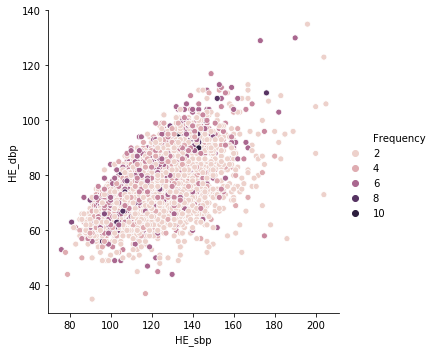

In [17]:
sns.relplot(data = data1, x = 'HE_sbp', y = 'HE_dbp', hue = 'Frequency')

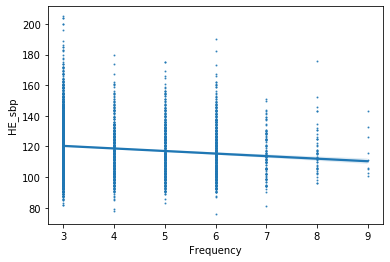

In [18]:
sns.regplot(data = data1, x = 'Frequency', y = 'HE_sbp', scatter_kws = {'s':1})

In [49]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_sbp'])
print(pearson_coef, p_value)

-0.13070308035537292 1.389546655167308e-19


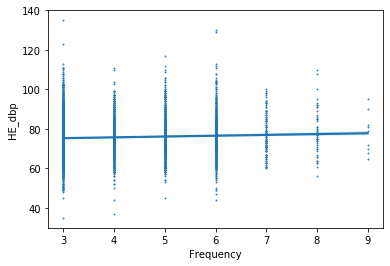

In [19]:
sns.regplot(data = data1, x = 'Frequency', y = 'HE_dbp', scatter_kws = {'s':1})

In [50]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_dbp'])
print(pearson_coef, p_value)

0.053073980272403586 0.0002493221269044918


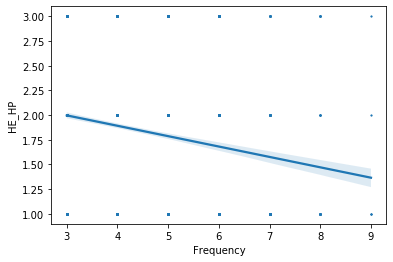

In [20]:
sns.regplot(data = data1, x = 'Frequency', y = 'HE_HP', scatter_kws = {'s':1})

In [51]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_HP'])
print(pearson_coef, p_value)

-0.15913496489110546 2.3028487897387067e-28


# 1-2. 맥박

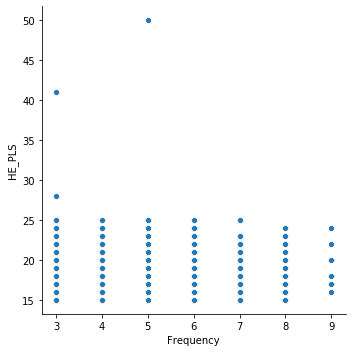

In [64]:
sns.relplot(data = data1, x = 'Frequency', y = 'HE_PLS')

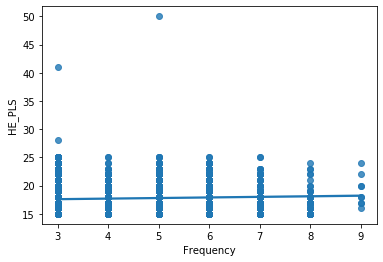

In [65]:
sns.regplot(data = data1, x = 'Frequency', y = 'HE_PLS')

In [66]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_PLS'])
print(pearson_coef, p_value)

0.061596428207875684 2.116973522116886e-05


# 1-3. 혈당

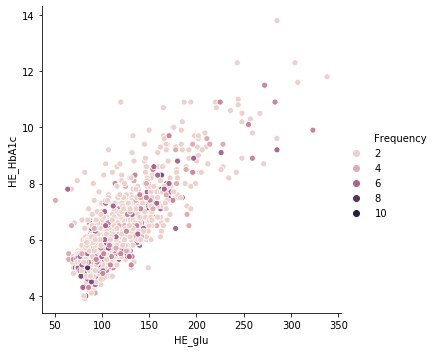

In [23]:
sns.relplot(data = data1, x = 'HE_glu', y = 'HE_HbA1c', hue = 'Frequency')

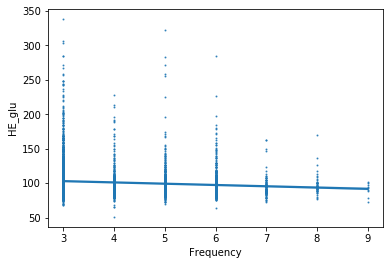

In [24]:
sns.regplot(data = data1,  x = 'Frequency', y = 'HE_glu', scatter_kws = {'s':1})

In [54]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_glu'])
print(pearson_coef, p_value)

-0.10873798449755608 5.407438018382283e-14


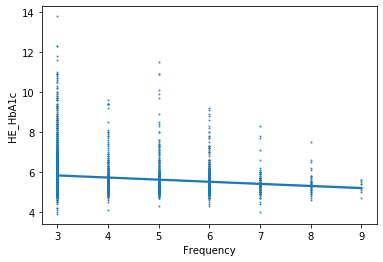

In [25]:
sns.regplot(data = data1,  x = 'Frequency', y = 'HE_HbA1c', scatter_kws = {'s':1})

In [55]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_HbA1c'])
print(pearson_coef, p_value)

-0.1722326599253935 5.2290746932004264e-33


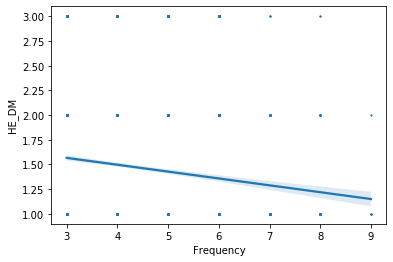

In [26]:
sns.regplot(data = data1,  x = 'Frequency', y = 'HE_DM', scatter_kws = {'s':1})

In [56]:
pearson_coef, p_value = stats.pearsonr(data1['Frequency'], data1['HE_DM'])
print(pearson_coef, p_value)

-0.12906520549400172 3.937840880370388e-19


# 2. 영양섭취와 혈관 건강의 연관성

In [67]:
data2 = pd.merge(dob, dos, how = 'outer').dropna()
data2

,ID,HE_PLS,HE_sbp,HE_dbp,HE_HP,HE_glu,HE_HbA1c,HE_DM,Hypertension,DiabetesMellitus,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,A901020501,18.0,150.0,84.0,3.0,103.0,6.0,2.0,hypertension,prediabetes,...,1.367163,0.775022,5.800000,0.000000,5.273475,10.000000,10.00000,5.000000,5.000000,0.000000
1,A901021301,17.0,132.0,77.0,2.0,127.0,6.2,3.0,prehypertension,diabetes,...,4.881043,1.641812,10.000000,10.000000,10.000000,3.418798,10.00000,4.345249,2.956568,5.000000
2,A901021302,17.0,156.0,73.0,3.0,134.0,5.2,3.0,hypertension,diabetes,...,3.367648,4.943629,4.849725,10.000000,0.000000,9.806158,10.00000,5.000000,5.000000,5.000000
4,A901023303,18.0,149.0,81.0,3.0,111.0,7.3,3.0,hypertension,diabetes,...,4.619405,0.437024,1.951565,0.000000,10.000000,8.029505,10.00000,0.000000,0.000000,1.244134
5,A901023304,17.0,121.0,60.0,3.0,51.0,7.4,3.0,hypertension,diabetes,...,2.459564,3.503124,2.135875,10.000000,0.000000,10.000000,10.00000,3.477269,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,R904028502,17.0,93.0,63.0,1.0,90.0,5.4,1.0,normal,normal,...,4.570954,3.868013,10.000000,10.000000,10.000000,2.395604,10.00000,5.000000,5.000000,5.000000
5414,R904028503,19.0,98.0,63.0,1.0,93.0,6.0,1.0,normal,normal,...,3.398006,3.656502,10.000000,0.023505,10.000000,10.000000,10.00000,5.000000,5.000000,0.000000
5415,R904028902,18.0,136.0,82.0,3.0,99.0,5.8,1.0,hypertension,normal,...,5.000000,3.460232,2.940008,7.280000,6.332807,10.000000,7.98486,2.797653,5.000000,0.000000
5416,R904029201,22.0,122.0,99.0,3.0,108.0,5.8,2.0,hypertension,prediabetes,...,5.000000,5.000000,10.000000,0.000000,0.000000,2.017411,10.00000,0.000000,0.000000,0.000000


# 2-1. 혈압

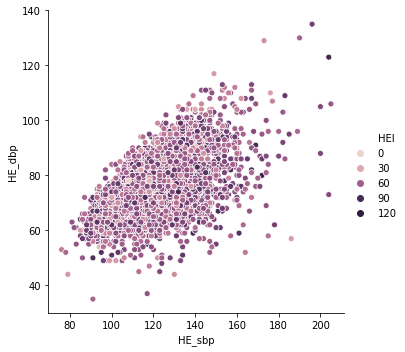

In [31]:
sns.relplot(data = data2, x = 'HE_sbp', y = 'HE_dbp', hue = 'HEI')

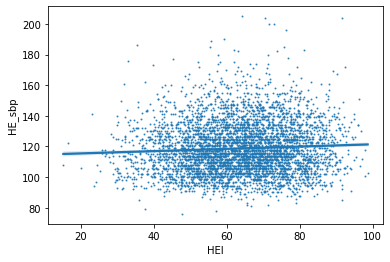

In [32]:
sns.regplot(data = data2, x = 'HEI', y = 'HE_sbp', scatter_kws = {'s':1})

In [57]:
pearson_coef, p_value = stats.pearsonr(data2['HEI'], data2['HE_sbp'])
print(pearson_coef, p_value)

0.05980137472486383 3.693379392312507e-05


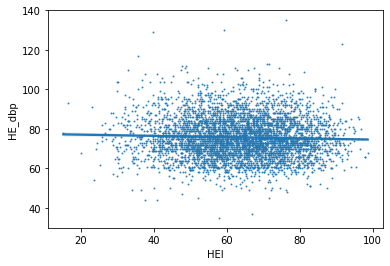

In [33]:
sns.regplot(data = data2, x = 'HEI', y = 'HE_dbp', scatter_kws = {'s':1})

In [58]:
pearson_coef, p_value = stats.pearsonr(data2['HEI'], data2['HE_dbp'])
print(pearson_coef, p_value)

-0.04094093764675456 0.004753376626407736


# 2-2. 맥박

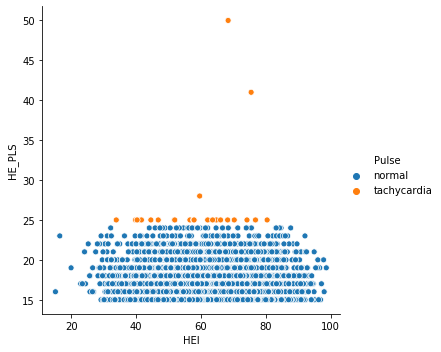

In [68]:
sns.relplot(data = data2, x = 'HEI', y = 'HE_PLS', hue = 'Pulse')

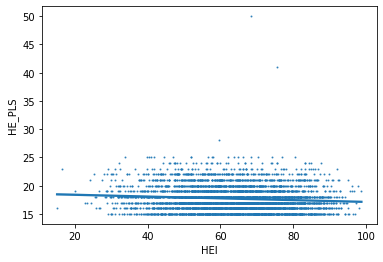

In [69]:
sns.regplot(data = data2, x = 'HEI', y = 'HE_PLS', scatter_kws = {'s':1})

In [59]:
pearson_coef, p_value = stats.pearsonr(data2['HEI'], data2['HE_PLS'])
print(pearson_coef, p_value)

-0.09717490995711119 1.8900914379053123e-11


# 2-3. 혈당

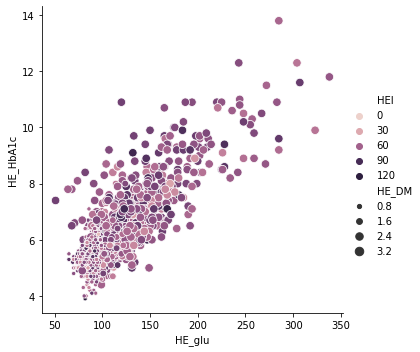

In [36]:
sns.relplot(data = data2, x = 'HE_glu', y = 'HE_HbA1c', hue = 'HEI', size = 'HE_DM')

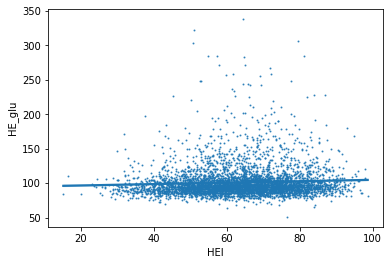

In [37]:
sns.regplot(data = data2, x = 'HEI', y = 'HE_glu', scatter_kws = {'s':1})

In [60]:
pearson_coef, p_value = stats.pearsonr(data2['HEI'], data2['HE_glu'])
print(pearson_coef, p_value)

0.061443343283812166 2.2415346662545784e-05


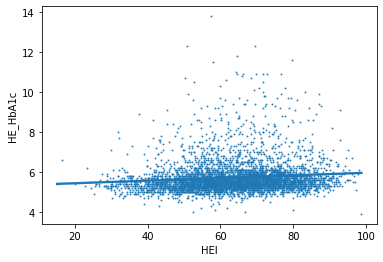

In [38]:
sns.regplot(data = data2, x = 'HEI', y = 'HE_HbA1c', scatter_kws = {'s':1})

In [61]:
pearson_coef, p_value = stats.pearsonr(data2['HEI'], data2['HE_HbA1c'])
print(pearson_coef, p_value)

0.1099974341440175 2.8416883802637537e-14


결론
(1)끼니별 식사 빈도는 혈압,맥박,혈당에 주는 영향이 크지 않다.
(2)식생활조사 결과는 혈압,맥박,혈당과 연관성이 미미하다.